In [1]:
import os
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

In [2]:
# set overall data path1
datapath1 = "/work2/hulk/work/jeff/openawsem_test/Fragment_mem_refine/fibril_monomer/CF_tool/run/CF_61ch_M_FM_all_1000/"
trj_file1 = [os.path.join(datapath1, f'CF_61ch_M_FM_all_1000_0{i}/run_03/movie.dcd') for i in range(0, 5)]
pdb_file1 = os.path.join(datapath1, 'CF_61ch_M_FM_all_1000_00/run_00/native.pdb')

In [3]:
# set overall data path2
datapath2 = "/work2/hulk/work/jeff/openawsem_test/Fragment_mem_refine/fibril_monomer/CF_tool/run/CF_61ch_M_FM_all_1000_2/"
trj_file2 = [os.path.join(datapath2, f'CF_61ch_M_FM_all_1000_2_0{i}/run_01/movie.dcd') for i in range(0, 5)]
pdb_file2 = os.path.join(datapath2, 'CF_61ch_M_FM_all_1000_2_00/run_00/native.pdb')

In [4]:
# set overall data path3
datapath3 = "/work2/hulk/work/jeff/openawsem_test/Fragment_mem_refine/fibril_monomer/CF_tool/run/CF_Nter_MF/"
trj_file3 = [os.path.join(datapath3, f'CF_Nter_MF_0{i}/run_01/movie.dcd') for i in range(0, 5)]
pdb_file3 = os.path.join(datapath3, 'CF_Nter_MF_00/run_00/native.pdb')

In [5]:
# set overall data path4
datapath4 = "/work2/hulk/work/jeff/openawsem_test/Fragment_mem_refine/fibril_monomer/CF_tool/run/CF_Nter_MF_2/"
trj_file4 = [os.path.join(datapath4, f'CF_Nter_MF_2_0{i}/run_00/movie.dcd') for i in range(0, 5)]
pdb_file4 = os.path.join(datapath4, f'CF_Nter_MF_2_00/run_00/native.pdb')

In [6]:
# Load trajectories of data path1
traj_CF_straight_o_00 = md.load(trj_file1[0], top = pdb_file1, stride=1000)
traj_CF_straight_o_01 = md.load(trj_file1[1], top = pdb_file1, stride=1000)
traj_CF_straight_o_02 = md.load(trj_file1[2], top = pdb_file1, stride=1000)
traj_CF_straight_o_03 = md.load(trj_file1[3], top = pdb_file1, stride=1000)
traj_CF_straight_o_04 = md.load(trj_file1[4], top = pdb_file1, stride=1000)

In [7]:
# Load trajectories of data path2
traj_CF_straight_n_00 = md.load(trj_file2[0], top = pdb_file2, stride=1000)
traj_CF_straight_n_01 = md.load(trj_file2[1], top = pdb_file2, stride=1000)
traj_CF_straight_n_02 = md.load(trj_file2[2], top = pdb_file2, stride=1000)
traj_CF_straight_n_03 = md.load(trj_file2[3], top = pdb_file2, stride=1000)
traj_CF_straight_n_04 = md.load(trj_file2[4], top = pdb_file2, stride=1000)

In [8]:
# Load trajectories of data path3
traj_NF_straight_o_00 = md.load(trj_file3[0], top = pdb_file3, stride=1000)
traj_NF_straight_o_01 = md.load(trj_file3[1], top = pdb_file3, stride=1000)
traj_NF_straight_o_02 = md.load(trj_file3[2], top = pdb_file3, stride=1000)
traj_NF_straight_o_03 = md.load(trj_file3[3], top = pdb_file3, stride=1000)
traj_NF_straight_o_04 = md.load(trj_file3[4], top = pdb_file3, stride=1000)

In [9]:
# Load trajectories of data path4
traj_NF_straight_n_00 = md.load(trj_file4[0], top = pdb_file4, stride=1000)
traj_NF_straight_n_01 = md.load(trj_file4[1], top = pdb_file4, stride=1000)
traj_NF_straight_n_02 = md.load(trj_file4[2], top = pdb_file4, stride=1000)
traj_NF_straight_n_03 = md.load(trj_file4[3], top = pdb_file4, stride=1000)
traj_NF_straight_n_04 = md.load(trj_file4[4], top = pdb_file4, stride=1000)

In [10]:
def calculate_main_axis(traj):
        topology = traj.topology
        
        # Calculate main axis for chains 0 and 60
        chain_positions = []
        
        chain_indice1 = topology.select('chainid 0 and residue 24 to 25 and name CA')
        
        chain_positions.append(traj.xyz[:, chain_indice1, :])
        
        chain_indice2 = topology.select('chainid 60 and residue 24 to 25 and name CA')
        
        chain_positions.append(traj.xyz[:, chain_indice2, :])
        
        #number_of_chain_positions = len(chain_positions)
        
        #print(number_of_chain_positions)
        #print(chain_positions)
        
        center1 = np.mean(chain_positions[0], axis=1)
        center2 = np.mean(chain_positions[1], axis=1)
        
        main_axis = center2 - center1
        
        #print("main_axis:", main_axis)
        
        #num_main = len(main_axis)
        
        #print("num_main", num_main)
        
        norms = np.linalg.norm(main_axis, axis=1)[:, np.newaxis]
        normalized_main_axis = main_axis / norms
        
        return normalized_main_axis

In [11]:
def calculate_z_vector(traj):
        topology = traj.topology
    
        ca_positions = []
        
        ca_indice1 = topology.select('chainid 61 and residue 8 and name CA')
        
        ca_positions.append(traj.xyz[:, ca_indice1, :])
        
        ca_indice2 = topology.select('chainid 61 and residue 13 and name CA')
        
        ca_positions.append(traj.xyz[:, ca_indice2, :])
        
        #print(ca_positions)
        
        z_vector = ca_positions[0] - ca_positions[1]
        
        #print("z_vector:", z_vector)
        
        #num_z = len(z_vector)
        
        #print("num_z", num_z)
        
        norms = np.linalg.norm(z_vector, axis=2)[:, :, np.newaxis]
        normalized_z_vector = z_vector / norms
        
        return normalized_z_vector

In [12]:
def calculate_p2(traj_file):
    main_axis = calculate_main_axis(traj_file)
    z_vector = calculate_z_vector(traj_file)
    z_vector = z_vector.reshape((z_vector.shape[0], z_vector.shape[2]))
    cos_theta = np.sum(main_axis * z_vector, axis=1)
    p2 = 0.5 * (3 * cos_theta**2 - 1)
    
    return p2

In [13]:
#Calculate P2 values
p2_values_CF_o = [calculate_p2(traj_CF_straight_o_00),
                  calculate_p2(traj_CF_straight_o_01),
                  calculate_p2(traj_CF_straight_o_02),
                  calculate_p2(traj_CF_straight_o_03),
                  calculate_p2(traj_CF_straight_o_04),
                  calculate_p2(traj_NF_straight_o_04)]

p2_values_CF_n = [calculate_p2(traj_CF_straight_n_00),
                  calculate_p2(traj_CF_straight_n_01),
                  calculate_p2(traj_CF_straight_n_02),
                  calculate_p2(traj_CF_straight_n_03),
                  calculate_p2(traj_CF_straight_n_04)]

p2_values_NF_o = [calculate_p2(traj_NF_straight_o_00), 
                  calculate_p2(traj_NF_straight_o_01), 
                  calculate_p2(traj_NF_straight_o_02), 
                  calculate_p2(traj_NF_straight_o_03)]

p2_values_NF_n = [calculate_p2(traj_NF_straight_n_01), 
                  calculate_p2(traj_NF_straight_n_02),
                  calculate_p2(traj_NF_straight_n_04)]

0.8006318 0.16519201


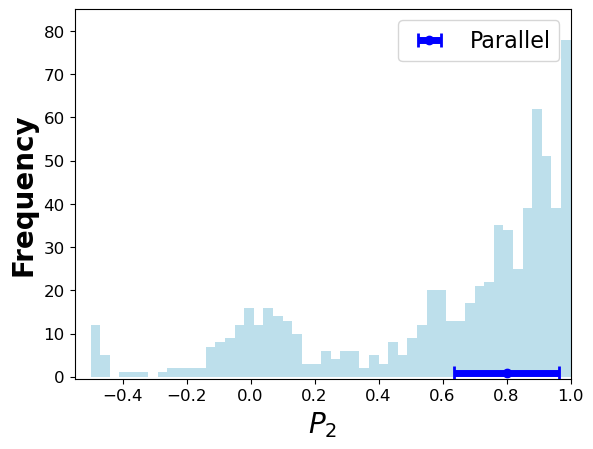

In [14]:
# Calculate frequency of P2 values
p2_values_NF_combined = np.concatenate(p2_values_NF_o + p2_values_NF_n)

# Calculate mean and standard deviation for error bars at -0.45 and 0.8
#near_neg045 = [i for i, value in enumerate(p2_values_NF_combined) if -0.5 <= value <= -0.3]
#values_near_neg045 = [p2_values_NF_combined[i] for i in near_neg045]
#mean_neg045 = np.mean(values_near_neg045)
#std_neg045 = np.std(values_near_neg045)

NF_near_pos08 = [i for i, value in enumerate(p2_values_NF_combined) if 0.3 <= value <= 1.0]
NF_values_near_pos08 = [p2_values_NF_combined[i] for i in NF_near_pos08]
NF_mean_pos08 = np.mean(NF_values_near_pos08)
NF_std_pos08 = np.std(NF_values_near_pos08)

print(NF_mean_pos08, NF_std_pos08)


# Plot histogram of P2 values
plt.hist(p2_values_NF_combined, bins=50, alpha=0.8, color='lightblue')


# Draw error bars at -0.45 and 0.8
#plt.errorbar(-0.45, mean_neg045, xerr=std_neg045, fmt='o', capsize=5, capthick=2, ecolor='lightseagreen', elinewidth=5, label='Perpendicular')
plt.errorbar(0.8, NF_mean_pos08, xerr=NF_std_pos08, fmt='bo', capsize=5, capthick=2, ecolor='blue', elinewidth=5, label='Parallel')

# Set label and title
plt.xlabel('$P_2$', fontsize=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xlim([-0.55, 1.0])
plt.ylim([-0.5, 85])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.legend(fontsize=16)
plt.show()

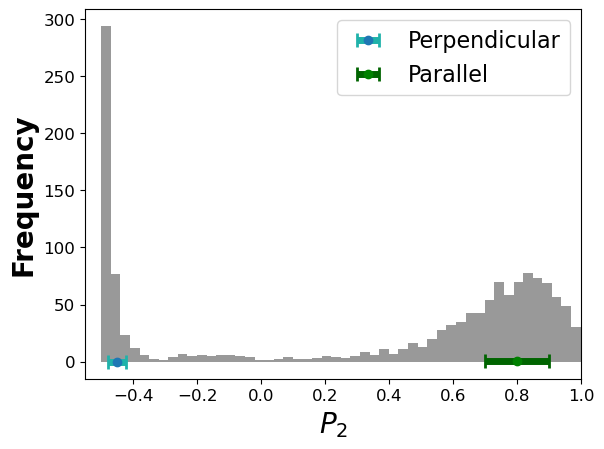

In [15]:
# Calculate frequency of P2 values
p2_values_CF_combined = np.concatenate(p2_values_CF_o + p2_values_CF_n)

# Calculate mean and standard deviation for error bars at -0.45 and 0.8
near_neg045 = [i for i, value in enumerate(p2_values_CF_combined) if -0.5 <= value <= -0.3]
values_near_neg045 = [p2_values_CF_combined[i] for i in near_neg045]
mean_neg045 = np.mean(values_near_neg045)
std_neg045 = np.std(values_near_neg045)

CF_near_pos08 = [i for i, value in enumerate(p2_values_CF_combined) if 0.6 <= value <= 1.0]
CF_values_near_pos08 = [p2_values_CF_combined[i] for i in CF_near_pos08]
CF_mean_pos08 = np.mean(CF_values_near_pos08)
CF_std_pos08 = np.std(CF_values_near_pos08)


# Plot histogram of P2 values
plt.hist(p2_values_CF_combined, bins=50, alpha=0.8, color='gray')


# Draw error bars at -0.45 and 0.8
plt.errorbar(-0.45, mean_neg045, xerr=std_neg045, fmt='o', capsize=5, capthick=2, ecolor='lightseagreen', elinewidth=5, label='Perpendicular')
plt.errorbar(0.8, CF_mean_pos08, xerr=CF_std_pos08, fmt='go', capsize=5, capthick=2, ecolor='darkgreen', elinewidth=5, label='Parallel')

# Set label and title
plt.xlabel('$P_2$', fontsize=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xlim([-0.55, 1.0])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.legend(fontsize=16)
plt.show()